<a href="https://colab.research.google.com/github/bama730/CS_4410/blob/main/HW2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

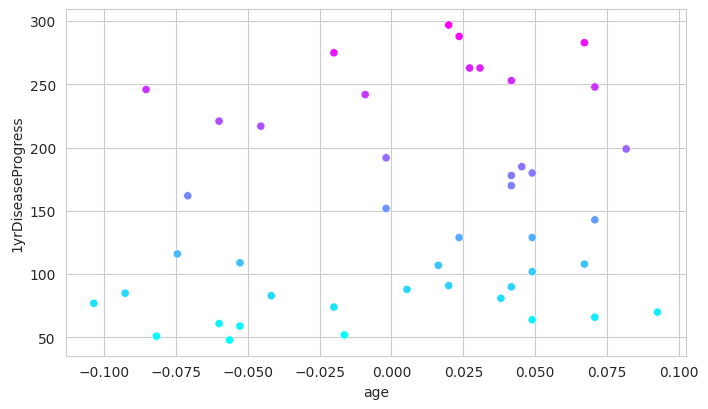

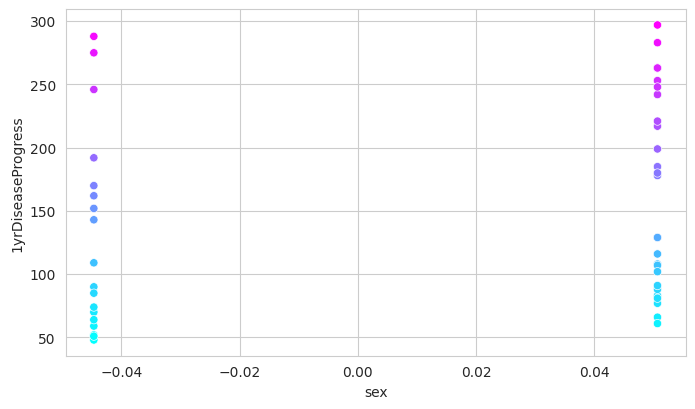

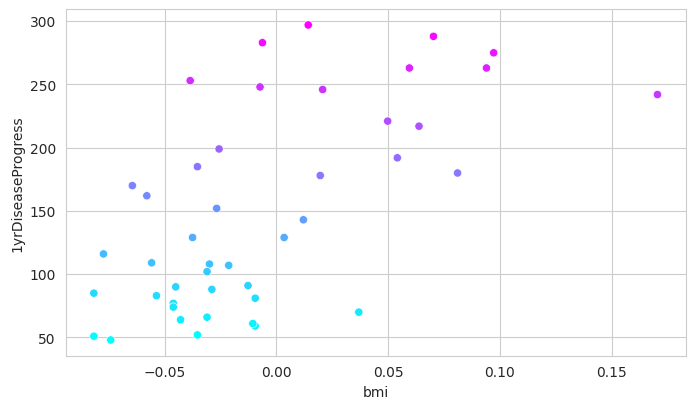

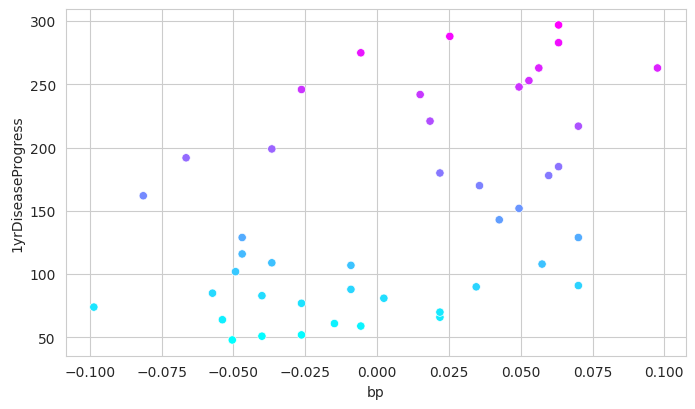

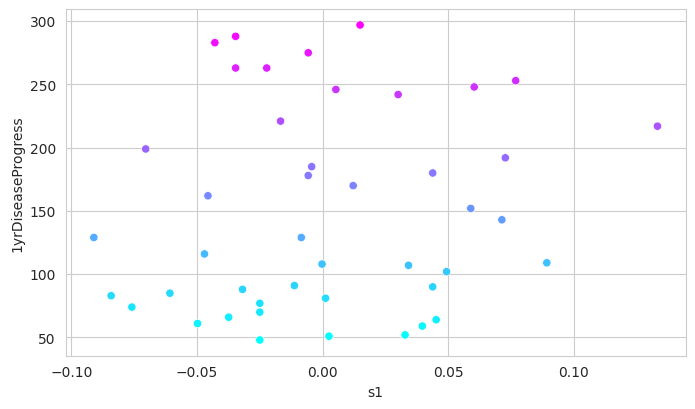

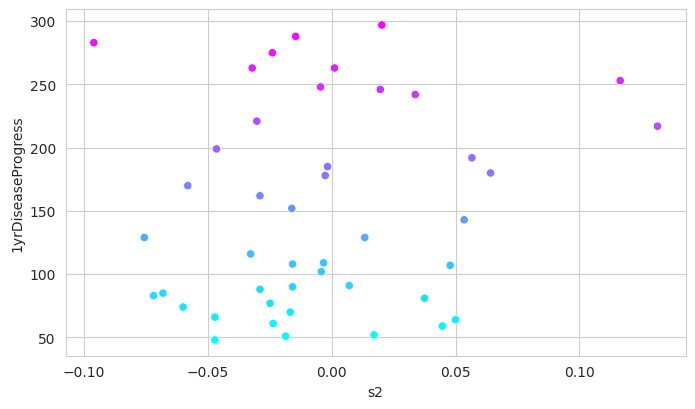

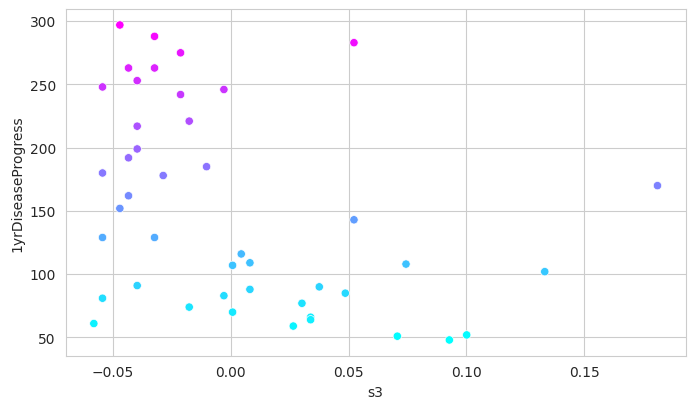

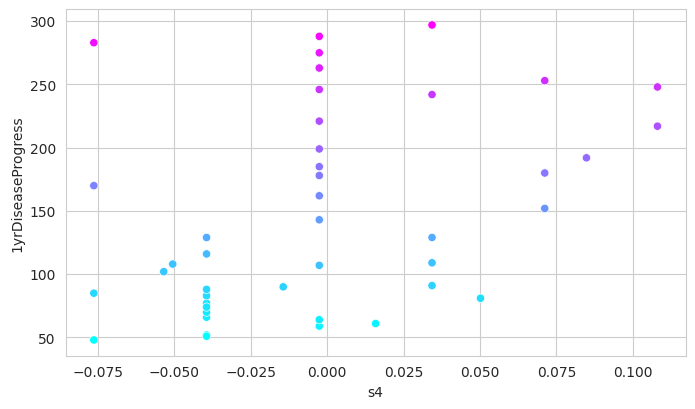

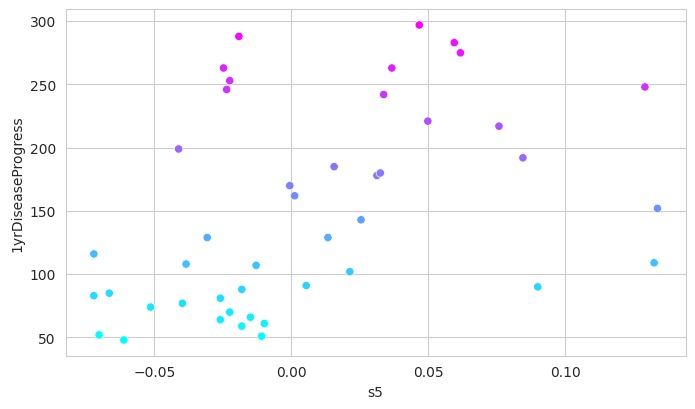

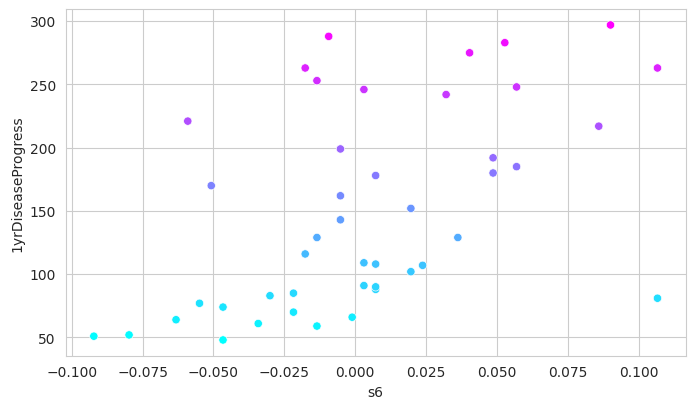

In [21]:
#Importing data, configuring imported modules
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn import datasets

pd.set_option('display.precision',4)
sns.set_style('whitegrid')

diabetes = datasets.load_diabetes()

#display descriptive info about data
print(diabetes.DESCR,'\n\n\n')
print(diabetes.data.shape)
print(diabetes.target.shape)
print(diabetes.feature_names,'\n\n\n')

#create dataframe for data
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['1yrDiseaseProgress'] = pd.Series(diabetes.target)

print('First 5 rows of data:','\n',diabetes_df.head(),'\n\n\n')

print('Description of data:','\n',diabetes_df.describe(), '\n\n\n')

diabetes_sample_df = diabetes_df.sample(frac=0.1, random_state=17)
print('Random sample:','\n',diabetes_sample_df)

for feature in diabetes.feature_names:
    plt.figure(figsize=(8, 4.5))
    sns.scatterplot(data=diabetes_sample_df, x=feature, y='1yrDiseaseProgress',
                  hue='1yrDiseaseProgress', palette='cool', legend=False)

(331, 10)
(111, 10)
       age: -60.21981405677291
       sex: -266.45705232203574
       bmi: 523.0634112596993
        bp: 310.5134699670048
        s1: -336.1614738106944
        s2: 137.3392923842451
        s3: -131.13923283453653
        s4: -1.1492348017315557
        s5: 622.3286855688128
        s6: 60.466457691682535
[115.46474836  83.4585369  160.77727376 187.65710274  72.72122197]
[ 79.  55. 109. 178.  39.]


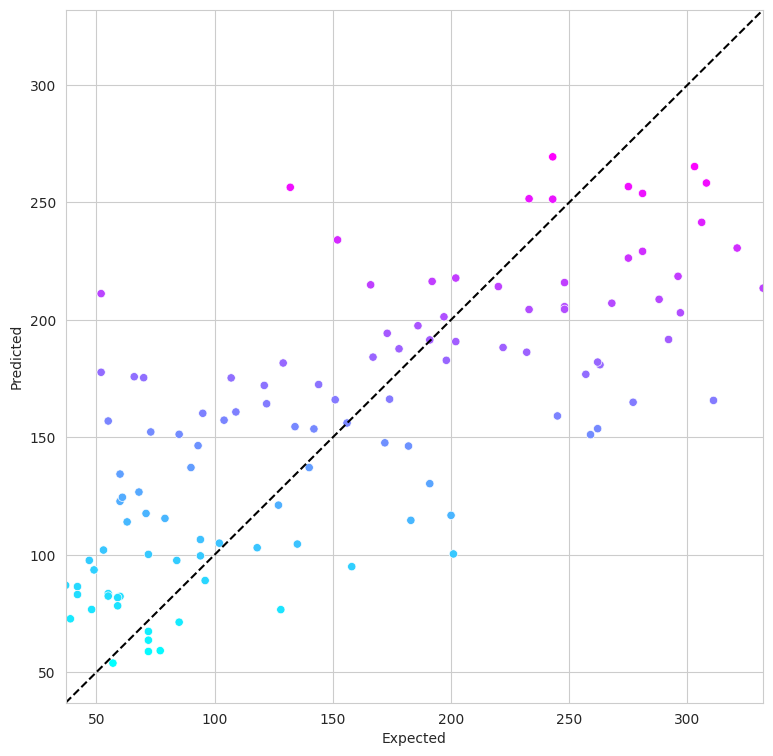

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=11)

print(X_train.shape)
print(X_test.shape)

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

linear_regression.intercept_

predicted = linear_regression.predict(X_test)

expected = y_test

print(predicted[:5])
print(expected[:5])

df = pd.DataFrame()

df['Expected'] = pd.Series(expected)

df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted',
                       palette='cool', legend=False)

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

In [35]:
from sklearn import metrics

metrics.r2_score(expected, predicted)

0.5322429620529407

In [44]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

from sklearn.model_selection import KFold, cross_val_score

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
                           X=diabetes.data, y=diabetes.target,
                           cv=kfold, scoring='r2')
    print(f'{estimator_name:>15}: ' +
          f'mean of r2 scores ={scores.mean():.3f}')

LinearRegression: mean of r2 scores =0.475
     ElasticNet: mean of r2 scores =-0.002
          Lasso: mean of r2 scores =0.339
          Ridge: mean of r2 scores =0.421
